Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import pandas.util.testing as tm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [ ]:
data_df=pd.read_excel('/content/drive/MyDrive/Data/SalesAmountvProductionAmount.xlsx')


In [ ]:
data_df.head()

,Date,Produced,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Sold,DOW
0,2020-01-01,70683.8700,0,0,0,1,0,0,35741.9051,Wednesday
1,2020-01-02,87948.9100,0,0,0,0,1,0,58629.8239,Thursday
2,2020-01-03,99238.2300,0,0,0,0,0,1,64896.4319,Friday
3,2020-01-04,128527.2800,0,0,0,0,0,0,84125.2729,Saturday
4,2020-01-05,100142.6399,1,0,0,0,0,0,56858.2200,Sunday


In [ ]:
# Define x and y
x=data_df.drop(['Date', 'Sold', 'DOW'], axis=1).values # create the independent variables dataframe
y=data_df['Sold'].values # create the dependent variable array 
   

In [ ]:
print(x) # display independent variables

[[7.06838700e+04 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.79489100e+04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [9.92382300e+04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [1.26615252e+05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.34230460e+05 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.38767510e+05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


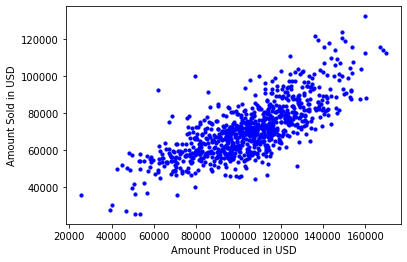

In [ ]:
plt.xlabel("Amount Produced in USD")
plt.ylabel("Amount Sold in USD")
plt.scatter(data_df.Produced,data_df.Sold, c="blue",s=10)

In [ ]:
#print(y) to display target variable values
print(y)

[ 35741.9051  58629.8239  64896.4319  84125.2729  56858.22    52244.8012
  49711.3441  50808.8328  53763.7933  61509.3995  64118.5901  62983.73
  49876.7053  46788.4132  54131.7787  55733.8279  67300.5415  81076.1643
  61763.85    58362.3839  48741.341   49025.7525  50784.3981  64829.8277
  80824.2406  57456.56    48604.3173  49265.0325  48907.0346  54068.5655
  70517.7677  89838.4379  60578.17    57366.2714  53844.0806  48981.3893
  39482.2343  69650.3607  80740.5374  59325.14    47951.5808  49029.8127
  51385.5544  49464.2489  59539.0693  78935.4845  52087.54    56541.7024
  49810.9927  52615.7471  47080.1756  64845.8341  79661.1255  55179.84
  47268.6165  54032.512   63156.948   62303.1718  72505.6454  91438.831
  60568.62    53179.5125  56084.4102  53042.7894  55805.4254  67033.304
  79448.7112  57543.64    55274.6896  49026.2161  50655.7633  47916.3117
  46050.5153  58529.6313  45531.74    36079.3663  30244.6393  25615.2349
  25800.3955  27363.0971  27564.79    92477.1531  53164.2

In [ ]:
# Split dataset into training and testing datasets
from sklearn.model_selection import train_test_split # get the train test and split function from the sklearn library
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) # will test on 30% of data


In [ ]:
# train the Model on the Training set
from sklearn.linear_model import LinearRegression
ml=LinearRegression() # create the model
ml.fit(x_train,y_train) # fit the model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [ ]:
# Use trained model to predict the target variable (we know these values, it's how we can tell the accuracy of the model before putting into production)
y_pred = ml.predict(x_test)
print(y_pred)


[ 56187.54937442  47767.72137803  57880.22148939  72848.67384975
  84607.7781946   71028.9116718   90537.8111672   71507.40381591
  60382.82112114  57470.88448949  68928.15920693  76712.86184478
  80830.48633152  69673.36842269  70300.54708132  70974.02501403
  60260.80800769  74564.98693465  76169.06932522  71308.7428121
  65981.58304701  64083.24159126 102888.69143868  70097.05791375
  88820.69933669  72030.89189956  68185.40420108  68684.1802638
  58955.40064268  70065.80958588  53520.68090016  73463.27256607
  69592.68183408  65297.56731779  59610.75366707  94696.50723089
  59355.47743395  63398.74176167  74956.78518764  68143.60801529
  63326.63215056  95226.8174762   71413.70286339  89777.97907552
  66796.31774448  47286.93549152  83655.12889024  69240.87889184
  66976.57305878  99915.53625265  95581.03126718  69443.42135746
  51442.2695293   89650.93666487  64101.15002945  64111.7350407
  70695.26143534  91023.19318061  85122.08293382  48163.03721517
 100000.36213767  67511.8479

In [ ]:
# input a row of values for the independent variables and see how close it gets to predicting the already known target variable
ml.predict([[142054.7351, 0, 0, 1, 0, 0, 0]])  # the actual value for profit is 82,207.56, if you refit the model, the prediction will (should) change

array([83056.2926046])

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

In [ ]:
# R-Square tells how much of the variation in the dependent variable can be explained by the independent variables used in the regression
# This means, 70% of the variation can be explained
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
adjR2 = adjR2 = 1 - ( 1-R2) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print(R2)
print(adjR2)

0.7063691779252618
0.7039651828907317


### **Plot Results**

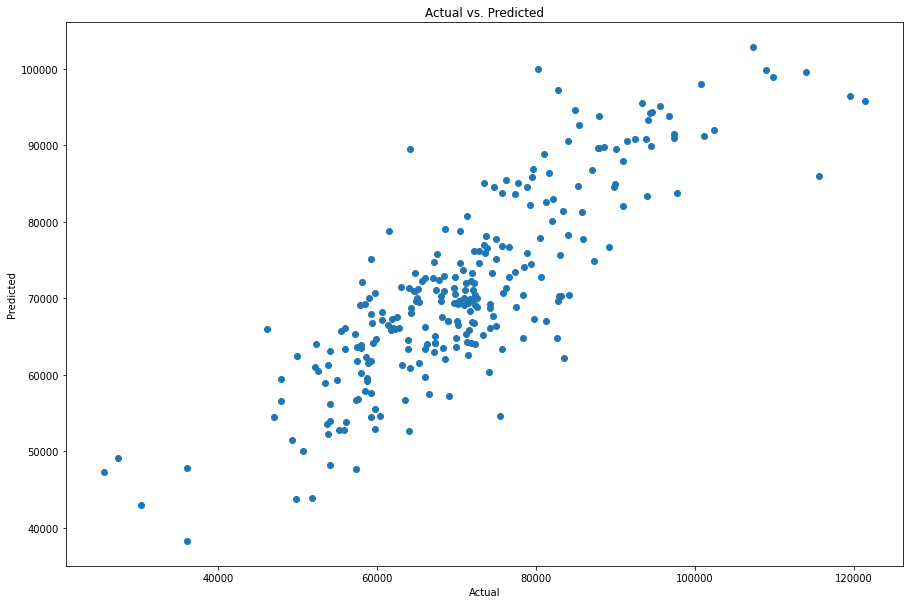

In [ ]:
# Plot the actual values and the predicte values (y)
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
# This shows a moderate to low positive correlation

Predicted Values

In [ ]:
#Predicted Values of "y" from the test set
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test - y_pred})
pred_y_df[0:20]
# Especially when the prediction is being made by a glorified adding machine

,Actual Value,Predicted Value,Difference
0,54032.5120,56187.549374,-2155.037374
1,36137.4031,47767.721378,-11630.318278
2,58481.4649,57880.221489,601.243411
3,80686.3860,72848.673850,7837.712150
4,89838.4379,84607.778195,5230.659705
5,64774.8250,71028.911672,-6254.086672
6,84009.5975,90537.811167,-6528.213667
7,62991.9838,71507.403816,-8515.420016
8,74149.0236,60382.821121,13766.202479
9,66489.2122,57470.884489,9018.327711
